<a href="https://colab.research.google.com/github/LillySh/WishList/blob/main/1_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Примеры про анализ данных.
Cambridge Anakytica:
дайте 300 лайков человека и мы предскажем его поведение лучше его мамы

Emerdata:
Для каждого человека агитационная реклама будет сгенерирована согласно его личным предпочтениям

Amazon:
Рекомендательная информация персональная (люди купившие этот товар, купили также) создаются машинноим обучением.

200 рекомендаций генерирует 30% продаж



Своя игра между ИИ (IBM Watson) и человеком: 
"Самопроизвольно закипает и без внешних причин охлаждается, хорошо взаимодействует с металлами одиннадцатой группы таблицы Менделеева, помогает снять стресс и является эффеткивным чистящим и моющим средством. Что за создание описано в одном журнале?"

IBM Watson сейчас уже используется в медицине. 

Курцвейл говорит, что программирование умрет как человеческая профессия в 2045 году.

**Генеральная совокупность и выборка** 

Генеральная совокупность - это набор объектов, которые мы изучаем.

Выборка - это те объекты, про которые у нас есть информация.

В процессе анализа важно делать вывод не о части, а о целом.

## Анализ данных создаёт модели.

Модель - абстрактное представление реальности в каокй-лиюо форме (например, в математической, физической, символической, графической), предназначенное для представления определенных аспктов этой реальности и позволяющее получить ответы на изучаемые ответы.

Анализирыемые данные орагнизованы в виде таблицы.

Объекты и характеристики объектов.

In [1]:
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
AH = pd.read_csv('AmesHousing.csv')

In [7]:
#В данном случае мы строим модель для цены дома (в таблице представлены харатеристики дома)
AH.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
#Выводим имена столбцов
AH.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [9]:
#Размерность таблицы с данными
print(AH.shape)

(2930, 82)


In [11]:
#Классы столбцов.Object возникает тогда, когда в столбце несколько классов. Лучше не сипользовтаь, так как постоянно придется думать о формате данных.
AH.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [12]:
#Описательные статистики
AH.describe(include = 'all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


В данном случае дома - это объекты, они же наблюдения или строчки.

Характеристики изучаемых объектов называются переменными или столбцы таблицы.

Но не все данные можно представить в виде таблицы, например, мед. карта пациента (можно, но очень не удобно).

В данном случае мы хотим построить модель определения цены для дома. У нас имеется 2930 домов.  

В бд есть реальная цена дома (самый последний столбец), которую мы взяли из какого-нибудь риэлторского агенства. 

# Наша цель, чтобы различия между реальной ценой дома и ценой, которую определила наша модель были минимальны. 

Критерий качества - это наш способ измерить насколько хорошо работает наша модель.

Самый естественный ритерий качества: берём реальное значение цены, берём то значение, которое выдаёт модель, считаем разность и получаем ошибку, погрешность.

Сумму моделей ошибок или средней модуля ошибок - это наш критерий качества.

Терминология:

Экспериментальное значение - это y.

Модельное, теоретическое значение - это y^.


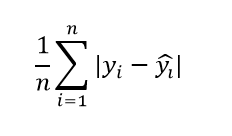

## **Что плохо в этих данных?**

Данные собирались не для нас. То есть перед тем как начать анализировать данные, нам нужно их перобразовать, кодировать.

Кодирование - это сопоставление каждому значению переменной некоторого числа, это число называется кодом. Например, пол: мужской - это 0, женский - это 1.

80% времени в анализе занимает подготовка данных.

Важно выбрать правильную кодировку, так как если выбрать случайную кодировку, то она может помещать а не помочь.

Например, нет смысл кодировать год, так как это уже своего рода кодировка.

# **Шкалирование**

Встречаются ситуации, когда некоторые числа не могут использоваться. 

То есть бывают ситуации, когда десятичные числа не имеют смысла, например, 1.5 человека.

Чтобы предупредить возможные ошибки с "запрещенными" числами и операциями введено понятие шкалы, в которой измерена переменная.

Для данных в разных шкалах разработаны свои методы анализа.

Удобно когда каждому типу данных соответствует свой класс.

Существуют три вида шкалы:

* Номинальная шкала, если значения переменной являются условными именами. Пример, имя, фамилия, пол и тд.

Единственная доступная операция - это подсчет. Например, сколько раз переменная принимала какое-то значение. Либо можем найти только моду.

* Порядковая (ранговая) шкала. Переменная измерена в данной шкале, если значение переменной можно сравнивать между собой, но разность значений не имеет смысла. Например, сорт товара, рейтинг (место компании в топ-100), оценка качества услуг в баллах.

* Количественная шкала позволяет отражать абсолютные количественные характеристики исследуемых объектов. Почти всегда это характеристики, измеренные в рублях, метрах, секундах.
Например, средний чек в универмаге.

# Смена шкал.

Например, часто от исходных числовых данных, измеренных в количественной шкале, переходят к порядковой шкале. Например, группировка по возрасту.

От ранговой или количественной шкалы можно перейти к номинальной шкале.

В обратном направлении переход трудные, но как правило неизбежный.

Например, переменную "город" заменяем на переменную "средний доход в городе".

Или например, One-Hot encoding вектор.



Наблюдения заменяем на ранги

Ранг - это номер наблюдения в упорядоченном ряду наблюдений.

Например, выборка состоит из чисел 7, 5, 12, 2, 8, 16.

Упорядочиваем от меньшего к большему.

ТОгда первый ранг будет иметь число 2, так как оно самое маленькое, второй ранг - 5, трейти - 7, четвертый - 8, пятый ранг - 16 (самое большое число).